**#Q1#**

*Import Libraries*

In [48]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

*Import the image*

In [49]:
img = cv2.imread('morphological_operations.png', cv2.IMREAD_GRAYSCALE) 
_, binary_img = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY)  

*Dilation and Erosion Class*

In [50]:
class Morphological_Operations:
    def __init__(self,src_image,struct_element,mode):
        self.mode=mode
        self.image=src_image
        self.element=struct_element
    def sizes(self):
        self.img_height,self.img_width=self.image.shape
        self.se_height,self.se_width=self.element.shape
        self.pad_y=self.se_height//2
        self.pad_x=self.se_width//2
        
    def dilation_erosion(self):
        self.sizes()
        image=np.zeros((self.img_height,self.img_width),dtype=int)
        padded_img = np.pad(self.image, ((self.pad_y, self.pad_y), (self.pad_x, self.pad_x)), mode='constant', constant_values=0)
        for i in range(self.img_height):
            for j in range(self.img_width):
                region = padded_img[i:i + self.se_height, j:j + self.se_width]
                if self.mode=="dilation":
                    if np.any(self.element & region):
                        image[i, j] = 1
                else:
                    if np.all(self.element & region):
                        
                        image[i, j] = 1           
        return image



**Displaying the results**

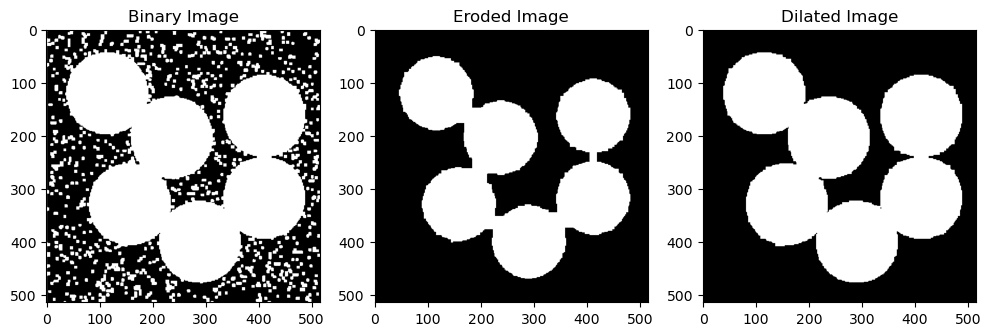

In [713]:
struct_element = np.ones((15, 15), dtype=int)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
morph_ops = Morphological_Operations(binary_img, struct_element,"erosion")
eroded_image = morph_ops.dilation_erosion()
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

morph_ops2 = Morphological_Operations(eroded_image, struct_element,"dilation")
dilated = morph_ops2.dilation_erosion()
plt.subplot(1, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.show()

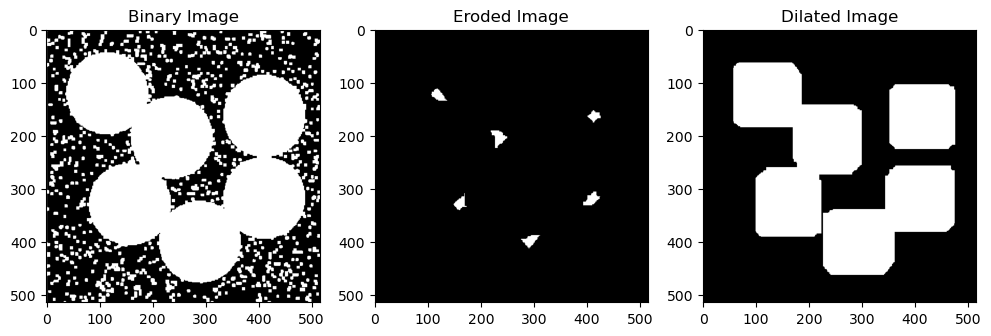

In [712]:
struct_element = np.ones((100, 100), dtype=int)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
morph_ops = Morphological_Operations(binary_img, struct_element,"erosion")
eroded_image = morph_ops.dilation_erosion()
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

morph_ops2 = Morphological_Operations(eroded_image, struct_element,"dilation")
dilated = morph_ops2.dilation_erosion()
plt.subplot(1, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.show()

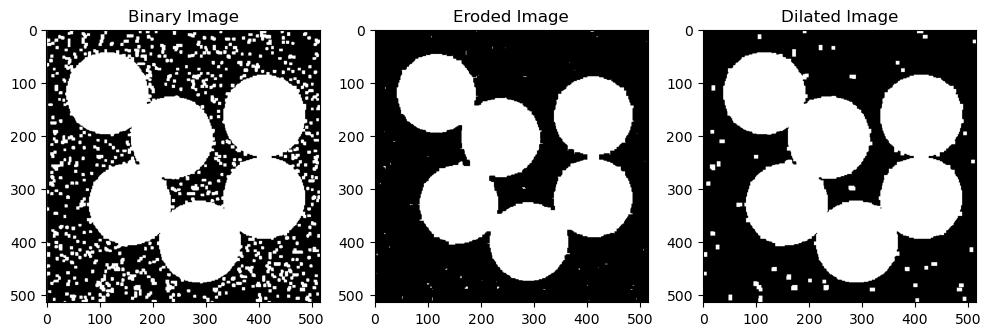

In [710]:
struct_element = np.ones((7, 7), dtype=int)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
morph_ops = Morphological_Operations(binary_img, struct_element,"erosion")
eroded_image = morph_ops.dilation_erosion()
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

morph_ops2 = Morphological_Operations(eroded_image, struct_element,"dilation")
dilated = morph_ops2.dilation_erosion()
plt.subplot(1, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.show()

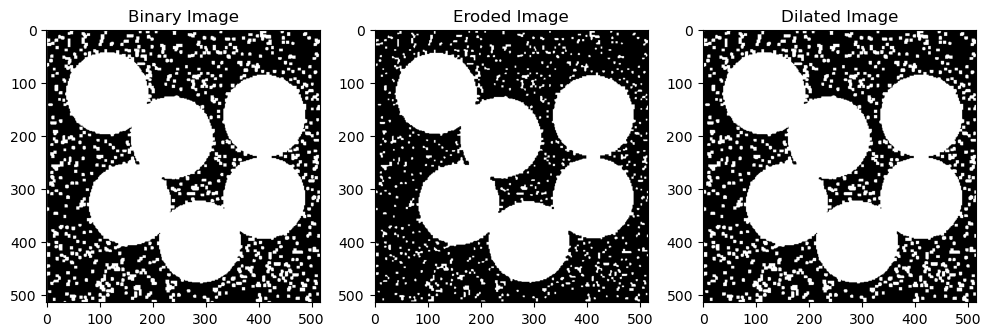

In [711]:
struct_element = np.ones((3, 3), dtype=int)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
morph_ops = Morphological_Operations(binary_img, struct_element,"erosion")
eroded_image = morph_ops.dilation_erosion()
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

morph_ops2 = Morphological_Operations(eroded_image, struct_element,"dilation")
dilated = morph_ops2.dilation_erosion()
plt.subplot(1, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.show()

*Q2*

PART1

In [87]:
class histogram:
    def __init__(self,image):
        self.image=image

    def apply_histogram(self):
        hist = np.zeros(256, dtype=int)#create histogram array (0-255)
        flat_image=self.image.flatten()#to processes easily vectorize image
        for i in flat_image:
            hist[i]+=1
        return hist
        
    def plot(self):
        hist=self.apply_histogram()
        built_in_hist = cv2.calcHist([self.image], [0], None, [256], [0, 256]).flatten()
        plt.figure(figsize=(12, 6))
    
        # Custom Histogram
        plt.subplot(1, 2, 1)
        plt.bar(range(256), hist, color='blue')
        plt.title('Grayscale Image Histogram')
        plt.xlabel('Pixel Intensity (0-255)')
        plt.ylabel('Frequency')
    
        # Built-in Histogram
        plt.subplot(1, 2, 2)
        plt.bar(range(256), built_in_hist, color='red', alpha=0.7)
        plt.title('Built-in Histogram (OpenCV)')
        plt.xlabel('Pixel Intensity (0-255)')
        plt.ylabel('Frequency')
    
        plt.tight_layout()
        plt.show()

*Image import*

In [88]:
hist1 = cv2.imread('hist1.jpg', cv2.IMREAD_GRAYSCALE) 
hist2= cv2.imread('hist2.jpg', cv2.IMREAD_GRAYSCALE) 

*Applying Histogram*

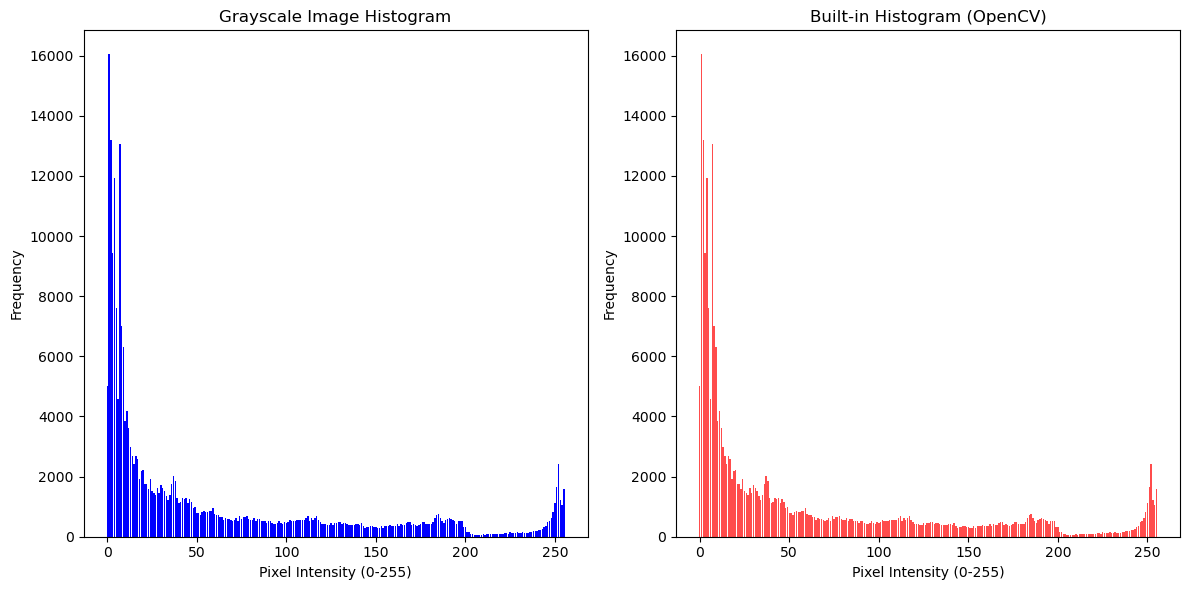

In [89]:
First_image=histogram(hist1)
First_image.plot()

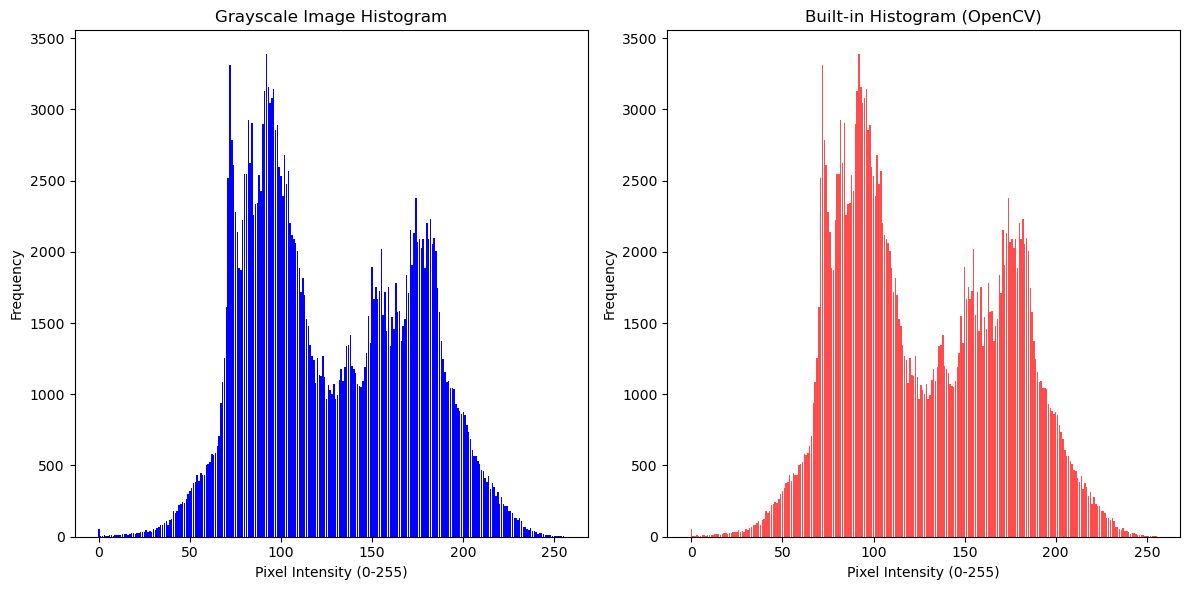

In [90]:
Second_image=histogram(hist2)
Second_image.plot()

*PART 2*

In [172]:
class contrast_streching:
    def __init__(self,image,c=0,d=255):
        self.image=image
        self.c=c
        self.d=d

    def con_stret(self):
        self.a=np.min(self.image)
        self.b=np.max(self.image)
        strech_image=np.zeros_like(self.image)
        strech_image=((self.image - self.a) / (self.b - self.a)) * (self.d - self.c) + self.c
        strech_image = np.clip(strech_image, 0, 255)
        return strech_image.astype(np.uint8)


    def show(self):
        strect_image=self.con_stret()
        
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(self.image, cmap='gray')
        plt.title('Original Grayscale Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(strect_image, cmap='gray')
        plt.title(f'Contrast Stretched Image c={self.c} and d={self.d}')
        plt.axis('off')
        plt.show()

**Import Image**

In [173]:
image = cv2.imread('contrastive_strecth.png')


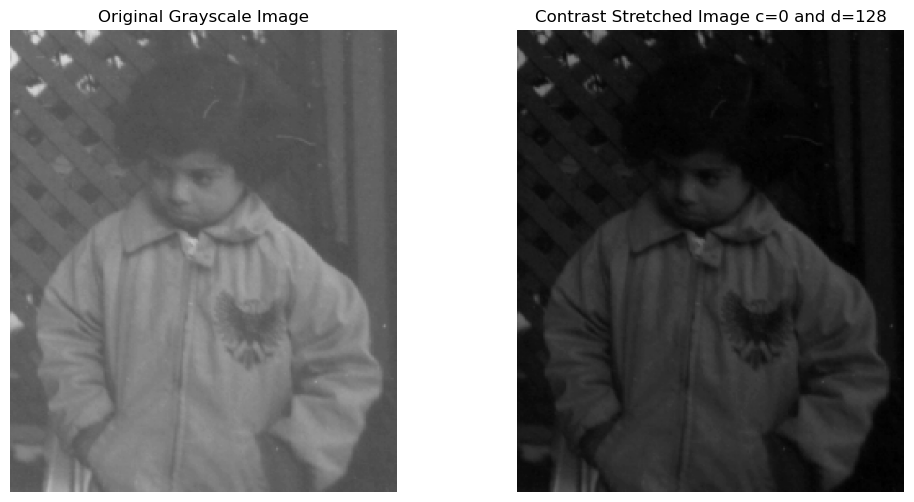

In [177]:
con_st1=contrast_streching(image,c=0,d=128)
con_st1.show()

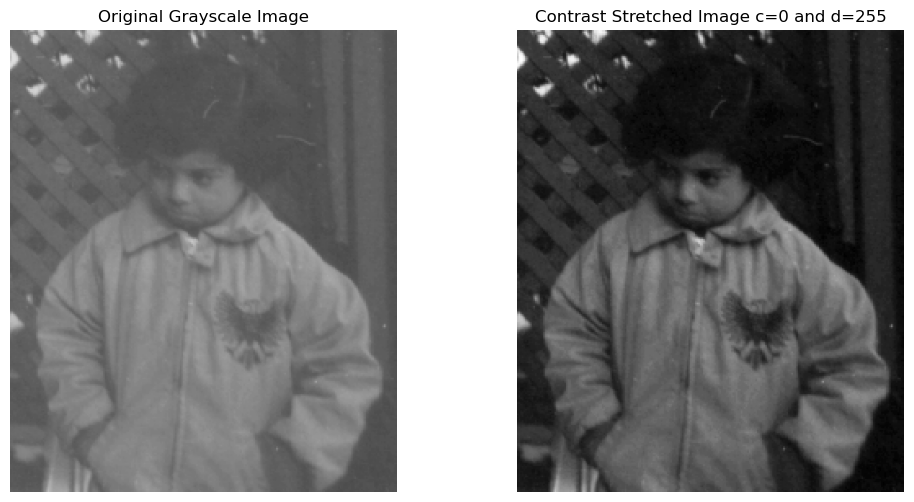

In [178]:
con_st2=contrast_streching(image,c=0,d=255)
con_st2.show()

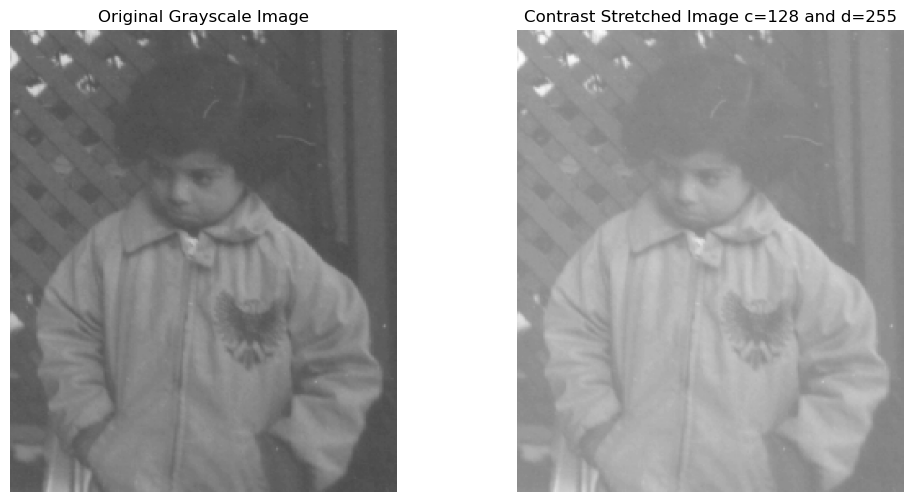

In [179]:
con_st3=contrast_streching(image,c=128,d=255)
con_st3.show()

****OTSU METHOD****

In [437]:
class OtsuThresholding:
    def __init__(self, src_image):
        self.image = src_image
        self.histogram = None
        self.threshold = 0

    def calculate_histogram(self):
        hist=histogram(self.image)
        self.histogram=hist.apply_histogram()

    def otsu_threshold(self):
        self.calculate_histogram()
        number_of_pixels = self.image.size
        sum_total = np.dot(np.arange(256), self.histogram)
        
        w_class0 = 0
        sum_class0 = 0
        current_max = 0

        for i in range(256):
            w_class0 += self.histogram[i]
            if w_class0 == 0:
                continue
            w_class1 = number_of_pixels - w_class0
            if w_class1 == 0:
                break
            sum_class0 += i * self.histogram[i]
            mean_class0 = sum_class0 / w_class0
            mean_class1 = (sum_total - sum_class0) / w_class1
            between_class_variance = w_class0 * w_class1 * (mean_class0 - mean_class1) ** 2
            if between_class_variance > current_max:
                current_max = between_class_variance
                self.threshold = i

    def display_image(self):
        self.otsu_threshold()
        binary_image = (self.image >= self.threshold).astype(np.uint8) * 255
        plt.figure(figsize=(12, 6))


        plt.subplot(1, 2, 1)
        plt.imshow(self.image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(binary_image, cmap='gray')
        plt.title('Binary Image (Otsu)')
        plt.axis('off')

        plt.tight_layout()
        plt.show()



**Import Images**

In [432]:
image1 = cv2.imread('otsu_1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('otsu_2.jpg', cv2.IMREAD_GRAYSCALE)

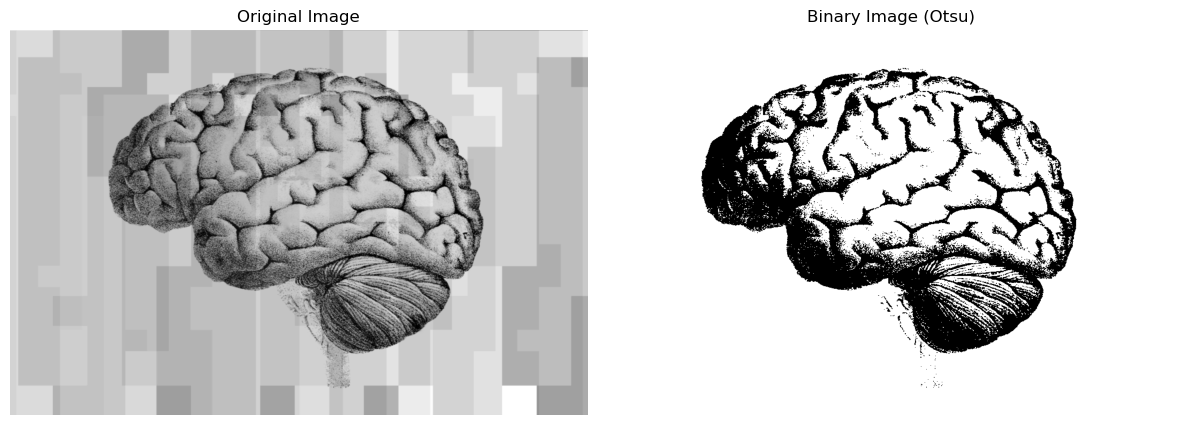

120

In [438]:
otsu1 = OtsuThresholding(image1)
otsu1.display_image()
otsu1.threshold
    

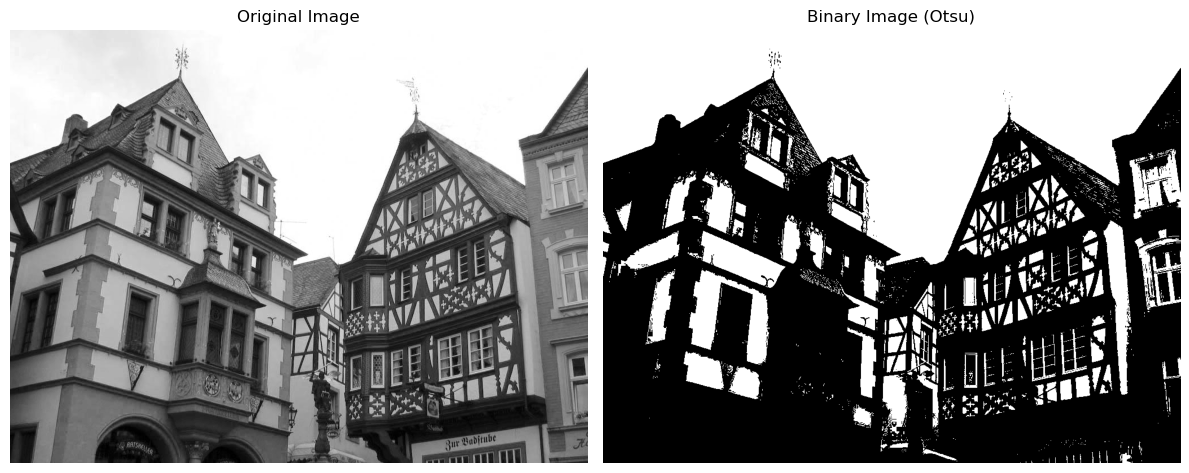

152


In [439]:
otsu2 = OtsuThresholding(image2)

otsu2.display_image()
print(otsu2.threshold)

**2D CONVOLUTION**

In [463]:
class Convolution2D:
    def __init__(self, image,sobel_x,sobel_y,prewitt_x,prewitt_y):
        self.image = image
        self.sobel_x=sobel_x
        self.sobel_y=sobel_y
        self.prewitt_x=prewitt_x
        self.prewitt_y=prewitt_y
        
    def sizes(self,kernel):
        self.img_height,self.img_width=self.image.shape
        self.kernel_height,self.kernel_width=kernel.shape
        self.pad_y=self.kernel_height//2
        self.pad_x=self.kernel_width//2

    def convolution(self,mode):
        filter_kernel = getattr(self, mode, None)
        if filter_kernel is not None:
            self.sizes(filter_kernel)
        else:
            print(f"Invalid mode: {mode}")
        self.image_matrix=np.zeros((self.img_height,self.img_width),dtype=int)
        padded_image = np.pad(self.image, ((self.pad_y, self.pad_y), (self.pad_x, self.pad_x)), mode='constant', constant_values=0)
        for i in range(self.img_height):
            for j in range(self.img_width):
                region = padded_image[i:i + self.kernel_height, j:j + self.kernel_width]
                self.image_matrix[i, j] = np.sum(region *filter_kernel)

        return self.image_matrix

    def plot_results(self):
        sobel_edge_x=self.convolution('sobel_x')
        sobel_edge_y=self.convolution('sobel_y')
        prewitt_edge_x=self.convolution('prewitt_x')
        prewitt_edge_y=self.convolution('prewitt_y')
        sobel_edges = np.sqrt(sobel_edge_x ** 2 + sobel_edge_y ** 2).astype(np.uint8)
        prewitt_edges = np.sqrt(prewitt_edge_x ** 2 + prewitt_edge_y ** 2).astype(np.uint8)

        plt.figure(figsize=(24, 12))
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')
    
        plt.subplot(1, 3, 2)
        plt.imshow(sobel_edges, cmap='gray')
        plt.title('Sobel Edges')
        plt.axis('off')
    
        plt.subplot(1, 3, 3)
        plt.imshow(prewitt_edges, cmap='gray')
        plt.title('Prewitt Edges')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        



*Import Image*

In [464]:
image = cv2.imread('convolution_spatial_domain.jpg', cv2.IMREAD_GRAYSCALE)

*Sobel and prewitt kernels*

In [465]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Sobel filter for horizontal edges
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # Sobel filter for vertical edges

prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Prewitt filter for horizontal edges
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  # Prewitt filter for vertical edges


*Plot Results*

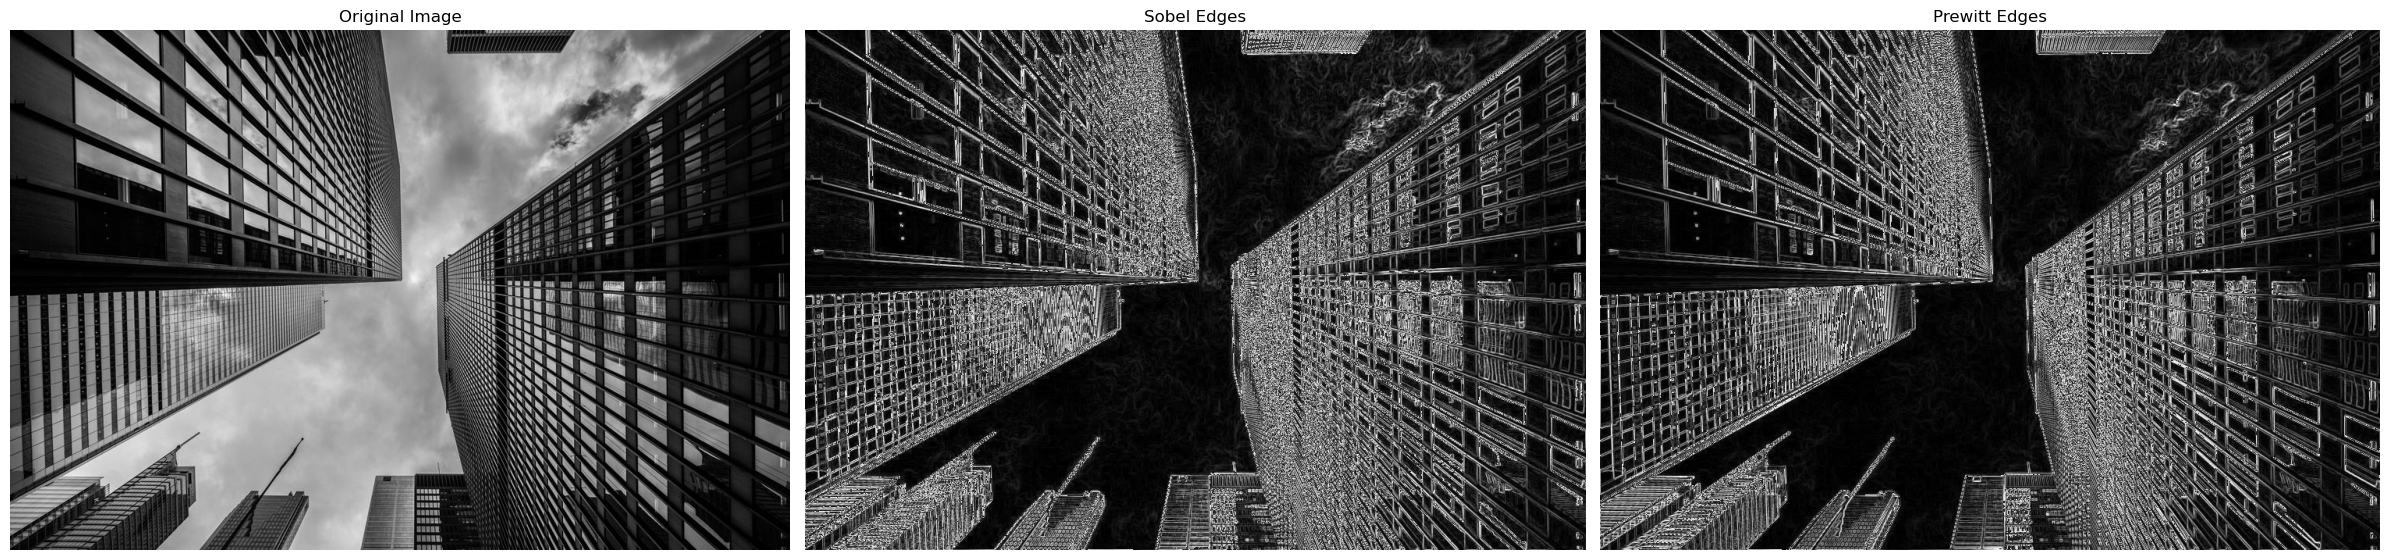

In [611]:
sobel_prewitt=Convolution2D(image,sobel_x,sobel_y,prewitt_x,prewitt_y)
sobel_prewitt.plot_results()

In [971]:
class FrequencyDomainFiltering:
    def __init__(self,image,sigma):
        self.image=image
        self.width,self.height=self.image.shape
        self.sigma=sigma

    def gaussian_filter(self):
        gauss_filter = np.zeros((self.height, self.width), np.float32)
        m = self.height // 2
        n = self.width // 2
        for y in range(self.height):
            for x in range(self.width):
                distance = (x - n)**2 + (y - m)**2
                gauss_filter[y, x] = np.exp(-distance / (2 * (self.sigma**2)))

        self.gauss=gauss_filter
        return gauss_filter.T



    def freq_filter(self):

        centered_image = self.image * np.fromfunction(lambda x, y: (-1)**(x + y), self.image.shape)
        DFT_of_image = np.fft.fft2(centered_image)
        gauss_filter = self.gaussian_filter()
        Multiply_res = DFT_of_image * gauss_filter
        I_DFT_res = np.fft.ifft2(Multiply_res)
        Real_I_DFT_res = np.real(I_DFT_res)
        Filtered_Image = Real_I_DFT_res * np.fromfunction(lambda x, y: (-1)**(x + y), self.image.shape)
        return Filtered_Image

    def display_results(self):
        Result=self.freq_filter()
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 3, 1)
        plt.imshow(self.image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(Result, cmap='gray')
        plt.title('Filtered Image (Gaussian Low-Pass)')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title(f'Gaussian filter with sigma={self.sigma}')
        plt.imshow(self.gauss.T, interpolation='none',cmap='gray',)
        plt.show()
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        
    

In [972]:
image4 = cv2.imread('convolution_freq_domain.jpg', cv2.IMREAD_GRAYSCALE)

In [991]:
deneme=FrequencyDomainFiltering(image4,5)

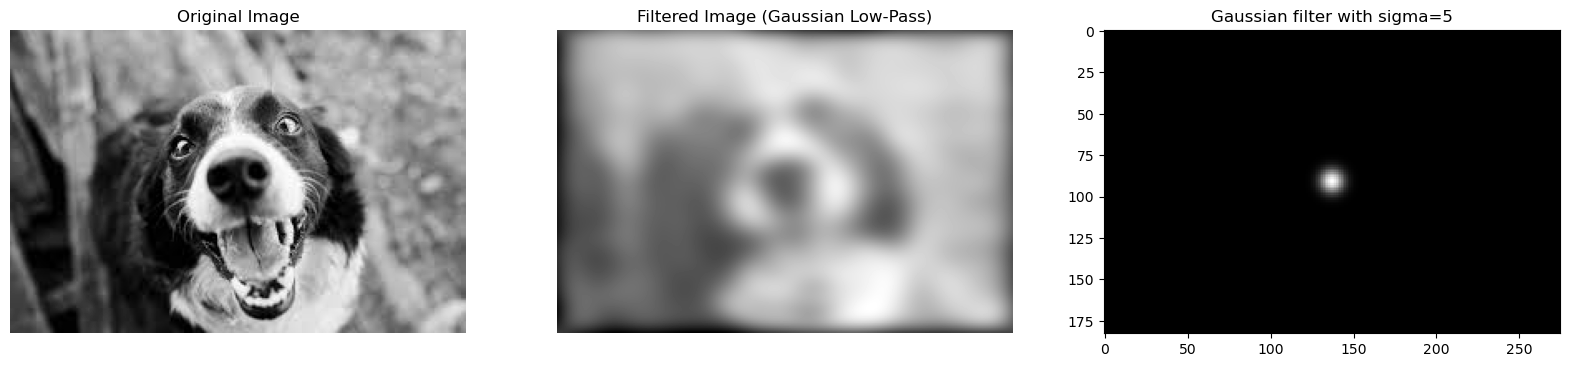

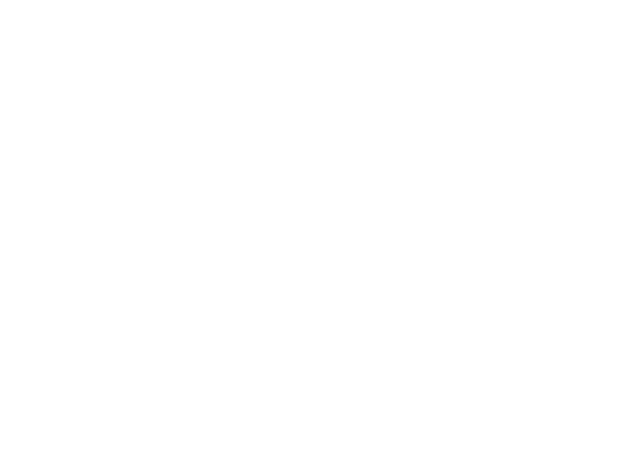

In [992]:
deneme.display_results()